# Workshop #3  Machine Learning for Predictive Analysis

Executive Education HEC Montréal (Sept. 2020)

Bruno Agard,
Department of Mathematics and industrial engineering,
École Polytechnique de Montréal

## Before to start

In [1]:
# you sould have the following packages installed :
# pandas, numpy, sklearn

# define the path where your saved the different data files 
path='data/'


# if the path is correct, then the head of the file "Reg_1.csv" will appear when running this few lines
import pandas as pd
import numpy as np

print('pandas version is ',pd.__version__)


File = pd.read_csv(path+"Reg_1.csv", sep=',')
# show it works
print("Extract of the file")
display(File.head(5))

# now enjoy the class :-)
        

pandas version is  0.24.2
Extract of the file


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,Y
0,0,-0.723710,0.706131,-0.681407,0.345742,-1.394799,0.991715,1.459279,0.264135,1.338809,-1.063509,56.028149
1,1,0.154322,-1.194278,-0.378550,-0.947253,0.017236,-0.848153,1.145411,0.921361,-1.134930,0.034793,-171.904331
2,2,-0.981547,-1.505534,-0.732014,1.352397,0.610571,-1.356184,1.067497,0.489973,1.367776,0.434883,28.320338
3,3,0.148850,0.012636,2.496297,-0.577869,0.301422,-0.955435,0.511744,1.172609,1.360648,0.782916,186.284571
4,4,-0.319502,0.283871,-1.899992,-0.488394,-1.059986,0.001327,-0.311576,-1.738088,1.229521,0.190225,63.100730


# Linear and logistic regression models

## Linear regression models

#### First Linear Regression Model, Ex 0

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array([[0, 0], [1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.array([ 3, 6, 8, 9, 11])

#fit the models
linreg = LinearRegression()
linreg.fit(X, y)

print("Score :", linreg.score(X, y))
print("Model coefficients :", linreg.coef_)
print("Model Intercept : ", linreg.intercept_)
print("Prediction for [3, 5] is", linreg.predict(np.array([[3, 5]])) )
print("MSE : %0.3f" % mean_squared_error(linreg.predict(X), y))

Score : 1.0
Model coefficients : [1. 2.]
Model Intercept :  3.000000000000001
Prediction for [3, 5] is [16.]
MSE : 0.000


#### Different Linear Regression Models, Ex 1

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

X = np.array([[0, 0, 0, 7], [1, 2.2, 1, 3], [1, 1.7, 2, 2], [2, 3.7, 2, 5], [2, 3.9, 3, 8]])
y = np.array([ 3, 6, 8, 9, 11])

#fit the models
linreg = LinearRegression().fit(X, y)
Lasreg = Lasso(alpha=0.1).fit(X, y)
Ridreg = Ridge(alpha=1.0).fit(X, y)
ElNreg = ElasticNet(alpha=0.1).fit(X, y)

print("Scores :")
print("        Linear Regression : %0.3f" % linreg.score(X, y))
print("         Lasso Regression : %0.3f" % Lasreg.score(X, y))
print("         Ridge Regression : %0.3f" % Ridreg.score(X, y))
print("    ElasticNet Regression : %0.3f" % ElNreg.score(X, y))

print("\nMSEs :")
print("        Linear Regression : %0.3f" % mean_squared_error(linreg.predict(X), y))
print("         Lasso Regression : %0.3f" % mean_squared_error(Lasreg.predict(X), y))
print("         Ridge Regression : %0.3f" % mean_squared_error(Ridreg.predict(X), y))
print("    ElasticNet Regression : %0.3f" % mean_squared_error(ElNreg.predict(X), y))

print("\nModel coef. :")
print("        Linear Regression : ", linreg.coef_, "Intercept : ", linreg.intercept_)
print("         Lasso Regression : ", Lasreg.coef_, "Intercept : ", Lasreg.intercept_)
print("         Ridge Regression : ", Ridreg.coef_, "Intercept : ", Ridreg.intercept_)
print("    ElasticNet Regression : ", ElNreg.coef_, "Intercept : ", ElNreg.intercept_)

Scores :
        Linear Regression : 1.000
         Lasso Regression : 0.998
         Ridge Regression : 0.981
    ElasticNet Regression : 0.995

MSEs :
        Linear Regression : 0.000
         Lasso Regression : 0.016
         Ridge Regression : 0.144
    ElasticNet Regression : 0.038

Model coef. :
        Linear Regression :  [ 1.00000000e+00  2.44249065e-15  2.00000000e+00 -8.49692262e-17] Intercept :  2.9999999999999982
         Lasso Regression :  [ 0.          0.50550836  1.94524949 -0.        ] Intercept :  3.124931593482109
         Ridge Regression :  [ 0.43742722  0.64425572  1.33239827 -0.00693289] Intercept :  3.296126397391536
    ElasticNet Regression :  [ 0.09771599  0.58877571  1.74467498 -0.        ] Intercept :  3.1370767050126194


#### Get Alphas from Cross Validation, Ex 1 - CV

In [6]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

LasregCV = LassoCV().fit(X, y)
RidregCV = RidgeCV().fit(X, y)
ElNregCV = ElasticNetCV().fit(X, y)

print("Performances with Cross Validation :")

print("\nAlphas :")
print("         LassoCV Regression : %0.3f" % LasregCV.alpha_)
print("         RidgeCV Regression : %0.3f" % RidregCV.alpha_)
print("    ElasticNetCV Regression : %0.3f" % ElNregCV.alpha_)

print("\nScores :")
print("         LassoCV Regression : %0.3f (%0.3f)" % (LasregCV.score(X, y), Lasreg.score(X, y)))
print("         RidgeCV Regression : %0.3f (%0.3f)" % (RidregCV.score(X, y), Ridreg.score(X, y)))
print("    ElasticNetCV Regression : %0.3f (%0.3f)" % (ElNregCV.score(X, y), ElNreg.score(X, y)))

print("\nMSEs :")
print("         Lasso Regression : %0.3f (%0.3f)" % (mean_squared_error(LasregCV.predict(X), y), mean_squared_error(Lasreg.predict(X), y)))
print("         Ridge Regression : %0.3f (%0.3f)" % (mean_squared_error(RidregCV.predict(X), y), mean_squared_error(Ridreg.predict(X), y)))
print("    ElasticNet Regression : %0.3f (%0.3f)" % (mean_squared_error(ElNregCV.predict(X), y), mean_squared_error(ElNreg.predict(X), y)))

print("\nModel coef. :")
print("         LassoCV Regression : ", LasregCV.coef_, "Intercept : ", LasregCV.intercept_)
print("         RidgeCV Regression : ", RidregCV.coef_, "Intercept : ", RidregCV.intercept_)
print("    ElasticNetCV Regression : ", ElNregCV.coef_, "Intercept : ", ElNregCV.intercept_)


Performances with Cross Validation :

Alphas :
         LassoCV Regression : 0.004
         RidgeCV Regression : 0.100
    ElasticNetCV Regression : 0.007

Scores :
         LassoCV Regression : 1.000 (0.998)
         RidgeCV Regression : 0.999 (0.981)
    ElasticNetCV Regression : 1.000 (0.995)

MSEs :
         Lasso Regression : 0.000 (0.016)
         Ridge Regression : 0.006 (0.144)
    ElasticNet Regression : 0.001 (0.038)

Model coef. :
         LassoCV Regression :  [ 7.46910053e-01  1.18979274e-01  2.01795595e+00 -3.35400184e-04] Intercept :  3.0030030889087245
         RidgeCV Regression :  [ 0.47669967  0.32251393  1.91533486 -0.00389139] Intercept :  3.041099514399317
    ElasticNetCV Regression :  [ 5.70284515e-01  2.16857483e-01  2.00815961e+00 -1.44633457e-03] Intercept :  3.011062667563638


#### Different Linear Regression Models, Ex 2

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# load the csv file
File = pd.read_csv(path+"Reg_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy() # this function is added in pandas 0.24
display(Data)
X = Data[:, 1:-1]
y = Data[:, -1] 
#display(X)
#display(y)

#fit the models
linreg = LinearRegression().fit(X, y)
Lasreg = Lasso(alpha=0.1).fit(X, y)
Ridreg = Ridge(alpha=1.0).fit(X, y)
ElNreg = ElasticNet(alpha=0.1).fit(X, y)

print("\nScores :")
print("        Linear Regression : %0.3f" % linreg.score(X, y))
print("         Lasso Regression : %0.3f" % Lasreg.score(X, y))
print("         Ridge Regression : %0.3f" % Ridreg.score(X, y))
print("    ElasticNet Regression : %0.3f" % ElNreg.score(X, y))

print("\nMSEs :")
print("         Linear Regression : %0.3f" % mean_squared_error(linreg.predict(X), y))
print("         LassoCV Regression : %0.3f" % mean_squared_error(Lasreg.predict(X), y))
print("         RidgeCV Regression : %0.3f" % mean_squared_error(Ridreg.predict(X), y))
print("    ElasticNetCV Regression : %0.3f" % mean_squared_error(ElNreg.predict(X), y))

i=22
print("\nPredictions for line ", i)
print("        Linear Regression : %0.3f" % linreg.predict(np.array([X[i,:]])) )
print("         Lasso Regression : %0.3f" % Lasreg.predict(np.array([X[i,:]])) )
print("         Ridge Regression : %0.3f" % Ridreg.predict(np.array([X[i,:]])) )
print("    ElasticNet Regression : %0.3f" % ElNreg.predict(np.array([X[i,:]])) )
print("\nReal value                : %0.3f" % y[i] )

array([[ 0.00000000e+00, -7.23710148e-01,  7.06130886e-01, ...,
         1.33880851e+00, -1.06350858e+00,  5.60281492e+01],
       [ 1.00000000e+00,  1.54322170e-01, -1.19427784e+00, ...,
        -1.13493040e+00,  3.47930102e-02, -1.71904331e+02],
       [ 2.00000000e+00, -9.81547210e-01, -1.50553410e+00, ...,
         1.36777581e+00,  4.34882561e-01,  2.83203383e+01],
       ...,
       [ 9.97000000e+02, -9.57886659e-01,  5.56610836e-01, ...,
         2.67509669e+00, -5.44819750e-01, -2.75221908e+01],
       [ 9.98000000e+02,  9.28979331e-01, -4.78047998e-02, ...,
        -1.31690986e-01,  4.04503019e-01,  9.00367989e+01],
       [ 9.99000000e+02, -1.78742968e+00,  1.81162193e+00, ...,
        -5.85659835e-01,  5.26922901e-01,  1.83629417e+02]])


Scores :
        Linear Regression : 0.758
         Lasso Regression : 0.758
         Ridge Regression : 0.758
    ElasticNet Regression : 0.756

MSEs :
         Linear Regression : 5505.981
         LassoCV Regression : 5506.086
         RidgeCV Regression : 5505.998
    ElasticNetCV Regression : 5546.026

Predictions for line  22
        Linear Regression : -3.681
         Lasso Regression : -3.997
         Ridge Regression : -3.675
    ElasticNet Regression : -3.537

Real value                : -39.064


#### With Cross Validation, Ex 2 - CV

In [13]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

RidregCV = RidgeCV().fit(X, y)
LasregCV = LassoCV().fit(X, y)
ElNregCV = ElasticNetCV().fit(X, y)

print("Alphas :")
print("        Lasso Regression : %0.3f" % LasregCV.alpha_)
print("        Ridge Regression : %0.3f" % RidregCV.alpha_)
print("   ElasticNet Regression : %0.3f" % ElNregCV.alpha_)

print("\nScore :")
print("        Lasso Regression : %0.3f" % LasregCV.score(X, y))
print("        Ridge Regression : %0.3f" % RidregCV.score(X, y))
print("   ElasticNet Regression : %0.3f" % ElNregCV.score(X, y))

print("\nMSEs :")
print("         LassoCV Regression : %0.3f" % mean_squared_error(LasregCV.predict(X), y))
print("         RidgeCV Regression : %0.3f" % mean_squared_error(RidregCV.predict(X), y))
print("    ElasticNetCV Regression : %0.3f" % mean_squared_error(ElNregCV.predict(X), y))

print("\nNew Predictions for line ", i)
print("         Lasso Regression : %0.3f" % LasregCV.predict(np.array([X[i,:]])) )
print("         Ridge Regression : %0.3f" % RidregCV.predict(np.array([X[i,:]])) )
print("    ElasticNet Regression : %0.3f" % ElNregCV.predict(np.array([X[i,:]])) )

print("\nReal value                : %0.3f" % y[i] )

Alphas :
        Lasso Regression : 1.009
        Ridge Regression : 1.000
   ElasticNet Regression : 0.153

Score :
        Lasso Regression : 0.757
        Ridge Regression : 0.758
   ElasticNet Regression : 0.754

MSEs :
         LassoCV Regression : 5514.715
         RidgeCV Regression : 5505.998
    ElasticNetCV Regression : 5594.749

New Predictions for line  22
         Lasso Regression : -6.517
         Ridge Regression : -3.675
    ElasticNet Regression : -3.468

Real value                : -39.064


## Logistic regression models

#### Ex 3

In [2]:
from sklearn.linear_model import LogisticRegression

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] # remove the first and last columns
y = Data[:, -1] 

# fit a model
LogReg=LogisticRegression().fit(X, y)

print("\nScore :", LogReg.score(X, y))

i=7
print("\nPrediction :")
print("  Probabilities :", LogReg.predict_proba(np.array([X[i,:]]) ) )
print("  Decision :", LogReg.predict(np.array([X[i,:]]) ) )
print("\nReal       :", y[i])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Score : 0.738

Prediction :
  Probabilities : [[0.34826406 0.65173594]]
  Decision : [1.]

Real       : 0.0


# Performance indicators

#### for continuous outputs, Ex 4

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print("MSE = ", mean_squared_error(y_true, y_pred))
print("MAE = ", mean_absolute_error(y_true, y_pred))


from math import sqrt
print("RMSE = ", sqrt(mean_squared_error(y_true, y_pred)))

MSE =  0.375
MAE =  0.5
RMSE =  0.6123724356957945


#### for discrete outputs, ex 5

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_true  = [0, 1, 1, 1, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 1, 1, 1, 1]

print("Confusion matrix : \n")
print(confusion_matrix(y_true, y_pred))
print("\nAccurary = ", accuracy_score(y_true, y_pred))
print("     5/8 = ", 5/8)
print("\nPrecision = ", precision_score(y_true, y_pred, average=None)) # on column
print("      1/2 = ", 1/2, ", 4/6 = ", 4/6)
print("\nRecall = ", recall_score(y_true, y_pred, average=None)) # on row
print("   1/3 = ", 1/3, ", 4/5 = ", 4/5)

Confusion matrix : 

[[1 2]
 [1 4]]

Accurary =  0.625
     5/8 =  0.625

Precision =  [0.5        0.66666667]
      1/2 =  0.5 , 4/6 =  0.6666666666666666

Recall =  [0.33333333 0.8       ]
   1/3 =  0.3333333333333333 , 4/5 =  0.8


#### ex 6

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_true = [1, 2, 3, 1, 2, 2, 1, 2, 3]
y_pred = [1, 1, 3, 1, 2, 3, 1, 2, 3]

print("Confusion matrix : \n")
print(confusion_matrix(y_true, y_pred))
print("\nAccurary = ", accuracy_score(y_true, y_pred))
print("     7/9 = ", 7/9)
print("\nPrecision = ", precision_score(y_true, y_pred, average=None))
print("     3/4 = ", 3/4, ", 2/2 = ", 2/2, ", 2/3 = ", 2/3)
print("\nRecall = ", recall_score(y_true, y_pred, average=None))
print("   3/3 = ", 3/3, ", 2/4 = ", 2/4, ", 2/2 = ", 2/2)

Confusion matrix : 

[[3 0 0]
 [1 2 1]
 [0 0 2]]

Accurary =  0.7777777777777778
     7/9 =  0.7777777777777778

Precision =  [0.75       1.         0.66666667]
     3/4 =  0.75 , 2/2 =  1.0 , 2/3 =  0.6666666666666666

Recall =  [1.  0.5 1. ]
   3/3 =  1.0 , 2/4 =  0.5 , 2/2 =  1.0


#### ROC curve, AUC, ex 7

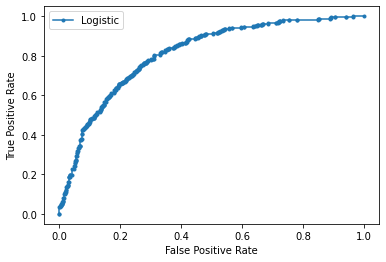

AUC=0.811


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 

# fit a model
LogReg=LogisticRegression().fit(X, y)

# predict probabilities
lr_probs = LogReg.predict_proba(X)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# summarize scores
print('AUC=%.3f' % (roc_auc_score(y, lr_probs)))

#### Learning, validation, test, ex 8


The model fits the TRAIN SET

How good is my model to fit the train data
AUC on train set is 0.80

How good is my model to predict for new data
AUC on test set is 0.82


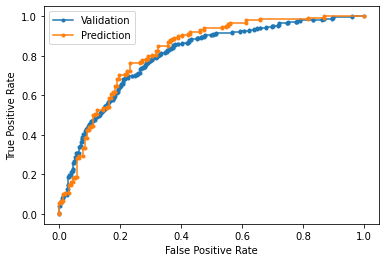

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3) # random selection happened here

# fit a model
print("\nThe model fits the TRAIN SET")
model = LogisticRegression().fit(X_train, y_train)

print("\nHow good is my model to fit the train data")
# predict probabilities
lr_probs_valid = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs_valid = lr_probs_valid[:, 1]
# calculate scores
print("AUC on train set is %.2f" % roc_auc_score(y_train, lr_probs_valid))

print("\nHow good is my model to predict for new data")
# predict probabilities
lr_probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs_test = lr_probs_test[:, 1]
# calculate scores
print("AUC on test set is %.2f" % roc_auc_score(y_test, lr_probs_test))

# calculate roc curves
lr_fpr_valid, lr_tpr_valid, _ = roc_curve(y_train, lr_probs_valid)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test, lr_probs_test)
# plot the roc curve for the model
pyplot.plot(lr_fpr_valid, lr_tpr_valid, marker='.', label='Validation')
pyplot.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Prediction')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Cross validation, ex 9

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 

model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=5)

print("\nAccuracy for each sample : ", scores);
print("Global accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy for each sample :  [0.715 0.75  0.755 0.76  0.695]
Global accuracy: 0.73 (+/- 0.05)


#### ex 10

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

# load the csv file
File = pd.read_csv(path+"Reg_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 

#define the models
linreg = LinearRegression()
Lasreg = Lasso(alpha=0.1)
Ridreg = Ridge(alpha=1.0)
ElNreg = ElasticNet(alpha=0.1)
LasregCV = LassoCV()
RidregCV = RidgeCV()
ElNregCV = ElasticNetCV()

#cross validate the models
linreg_scores = cross_val_score(linreg, X, y, cv=5)
Lasreg_scores = cross_val_score(Lasreg, X, y, cv=5)
Ridreg_scores = cross_val_score(Ridreg, X, y, cv=5)
ElNreg_scores = cross_val_score(ElNreg, X, y, cv=5)
LasregCV_scores = cross_val_score(LasregCV, X, y, cv=5)
RidregCV_scores = cross_val_score(RidregCV, X, y, cv=5)
ElNregCV_scores = cross_val_score(ElNregCV, X, y, cv=5)

print("\nGlobal accuracy")
print("  Linear regression : %0.3f (+/- %0.3f)" % (linreg_scores.mean(), linreg_scores.std() * 2))
print("              Lasso : %0.3f (+/- %0.3f)" % (Lasreg_scores.mean(), Lasreg_scores.std() * 2))
print("              Ridge : %0.3f (+/- %0.3f)" % (Ridreg_scores.mean(), Ridreg_scores.std() * 2))
print("         ElasticNet : %0.3f (+/- %0.3f)" % (ElNreg_scores.mean(), ElNreg_scores.std() * 2))
print("\n            LassoCV : %0.3f (+/- %0.3f)" % (LasregCV_scores.mean(), LasregCV_scores.std() * 2))
print("            RidgeCV : %0.3f (+/- %0.3f)" % (RidregCV_scores.mean(), RidregCV_scores.std() * 2))
print("       ElasticNetCV : %0.3f (+/- %0.3f)" % (ElNregCV_scores.mean(), ElNregCV_scores.std() * 2))


Global accuracy
  Linear regression : 0.750 (+/- 0.038)
              Lasso : 0.750 (+/- 0.038)
              Ridge : 0.750 (+/- 0.038)
         ElasticNet : 0.749 (+/- 0.038)

            LassoCV : 0.751 (+/- 0.037)
            RidgeCV : 0.750 (+/- 0.038)
       ElasticNetCV : 0.747 (+/- 0.038)


# Trees

## Decision Trees

#### Simple Tree, ex 20

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

X0 = np.array([[1, 0, 0], [2, 0, 0], [1, 0, 0],      [1, 0, 0], [1, 0, 0], [1, 0, 0],     
[2, 0, 0], [1, 0, 0], [2, 0, 0],        [2, 0, 0], [1, 0, 0], [2, 0, 0],        [2, 0, 0], [2, 0, 0], [1, 0, 0]] )
X1 = np.array([[0, 2, 0], [0, 1, 0], [0, 1, 0],      [0, 2, 0], [0, 2, 0], [0, 1, 0],     
[0, 1, 0], [0, 2, 0], [0, 2, 0],        [0, 2, 0], [0, 1, 0], [0, 2, 0],        [0, 1, 0], [0, 2, 0], [0, 2, 0]] )
X2 = np.array([[0, 0, 2], [0, 0, 2], [0, 0, 1],      [0, 0, 2], [0, 0, 2], [0, 0, 2],     
[0, 0, 2], [0, 0, 2], [0, 0, 2],        [0, 0, 1], [0, 0, 2], [0, 0, 2],        [0, 0, 2], [0, 0, 2], [0, 0, 1]] )

X=X0

y=np.array([1, 2, 3, 3, 3, 1, 2, 1, 2, 3, 1, 2, 2, 1, 3])

# Creating the classifier object 
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=1, min_samples_leaf=1).fit(X, y) 

# draw the tree
tree.plot_tree(clf)

print("\n***** Learning performances: *****") 
# make predictions
y_valid = clf.predict(X)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y, y_valid))
print ("Accuracy : ", accuracy_score(y, y_valid)*100) 

#### Ex 21

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Creating the classifier object 
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=2, min_samples_leaf=1).fit(X_train, y_train) 
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=1)

# draw the tree
tree.plot_tree(clf)

print("\n***** Learning performances: *****") 
# make predictions
y_valid = clf.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 

print("\n***** Prediction performances: *****") 
# make predictions
y_pred = clf.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

## Regression tree, ex 22

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error

# load the csv file
File = pd.read_csv(path+"Reg_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Creating the classifier object 
clf = tree.DecisionTreeRegressor(criterion = 'mse', max_depth=2, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train) 

# draw the tree
tree.plot_tree(clf);

print("\n***** Learning performances: *****") 
y_valid=clf.predict(X_train)
print("MSE = ", mean_squared_error(y_valid, y_train))

print("\n***** Prediction performances: *****") 
y_pred=clf.predict(X_test)
print("MSE = ", mean_squared_error(y_pred, y_test))

# Random forests

#### Classifier, ex 23

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Learn the classifier
RdmF = RandomForestClassifier(n_estimators=4, criterion = "gini", max_depth=3)
RdmF.fit(X_train, y_train);

print("\n***** Learning performances: *****") 
# make predictions
y_valid = RdmF.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 

print("\n***** Prediction performances: *****") 
# make predictions
y_pred = RdmF.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

#### Regressor

It would be the same, using "from sklearn.ensemble import RandomForestRegressor"

## Gradient Boosting

#### ex 24

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Creating the classifier object 
clf = GradientBoostingClassifier(n_estimators=5).fit(X_train, y_train) 

print("\n***** Learning performances: *****") 
# make predictions
y_valid = clf.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 

print("\n***** Prediction performances: *****") 
# make predictions
y_pred = clf.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

#### ex 25

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# load the csv file
File = pd.read_csv(path+"Reg_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

# Creating the classifier object 
clf = GradientBoostingRegressor(random_state=0).fit(X_train, y_train) 

print("\n***** Learning performances: *****") 
y_valid=clf.predict(X_train)
print("MSE = ", mean_squared_error(y_valid, y_train))


print("\n***** Prediction performances: *****") 
y_pred=clf.predict(X_test)
print("MSE = ", mean_squared_error(y_pred, y_test))

# Neural Networks

#### Perceptron, ex 30

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 


model = Perceptron().fit(X_train, y_train)

print("Train score = ", model.score(X_train, y_train))
print(" Test score = ", model.score(X_test, y_test))

print("\nWhat is inside :")
print(" Number of iterrations :", model.n_iter_)
print(" Coefs : ", model.coef_)
print(" Treshold :", model.intercept_)

#### Compare performances :

In [ ]:
print("****** Perceptron ******")

print("** Learning performances: **") 
# make predictions
y_valid = model.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 
print("** Prediction performances: **") 
# make predictions
y_pred = model.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 




print("\n****** Logistic Regression ******")
from sklearn.linear_model import LogisticRegression

Log_reg=LogisticRegression().fit(X_train, y_train)

print("** Learning performances: **") 
# make predictions
y_valid = Log_reg.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 
print("** Prediction performances: **") 
# make predictions
y_pred = Log_reg.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

#### Multilayer Perceptron, Classifier ex 31

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# load the csv file
File = pd.read_csv(path+"Classif_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

model = MLPClassifier(max_iter=500, hidden_layer_sizes=5, learning_rate="constant", learning_rate_init=0.001)
model.fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)

print("Learning errors")
print("    Accurary = ", accuracy_score(y_train, y_valid))

print("\nPrediction errors")
print("    Accurary = ", accuracy_score(y_test, y_pred))

print("\nWhat is inside :")
print(" Number of iterrations :", model.n_iter_)
print(" Number of layers : ", model.n_layers_)
print(" Coefs : ", model.coefs_)
print(" Tresholds :", model.intercepts_)

#### Compare performances :

In [ ]:
print("****** Multilayer Perceptron ******")

print("** Learning performances: **") 
# make predictions
y_valid = model.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 
print("** Prediction performances: **") 
# make predictions
y_pred = model.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 


print("\n****** Logistic Regression ******")
from sklearn.linear_model import LogisticRegression
Log_reg=LogisticRegression().fit(X_train, y_train)

print("** Learning performances: **") 
# make predictions
y_valid = Log_reg.predict(X_train)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 
print("** Prediction performances: **") 
# make predictions
y_pred = Log_reg.predict(X_test)
#evaluate results
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 

#### Multilayer Perceptron, Regressor ex 32

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# load the csv file
File = pd.read_csv(path+"Reg_1.csv", sep=',')

#Extract inputs (X) and output (y)
Data=File.to_numpy()
X = Data[:, 1:-1] 
y = Data[:, -1] 
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

model = MLPRegressor(max_iter=10000, hidden_layer_sizes=10, learning_rate="constant", learning_rate_init=0.001)
model.fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)

print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))

print("\nPrediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
print("****** Multilayer Perceptron ******")
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))


print("\n****** Linear Regression ******")
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

print("\n****** Lasso Regression ******")
from sklearn.linear_model import Lasso
model=Lasso(alpha=0.1).fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

print("\n****** Ridge Regression ******")
from sklearn.linear_model import LinearRegression
model=Ridge(alpha=1.0).fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

print("\n****** ElasticNet Regression ******")
from sklearn.linear_model import Lasso
model=ElasticNet(alpha=0.1).fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))


print("\n****** LassoCV Regression ******")
from sklearn.linear_model import Lasso
model=LassoCV().fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

print("\n****** RidgeCV Regression ******")
from sklearn.linear_model import LinearRegression
model=RidgeCV().fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

print("\n****** ElasticNetCV Regression ******")
from sklearn.linear_model import Lasso
model=ElasticNetCV().fit(X_train, y_train)

y_valid=model.predict(X_train)
y_pred=model.predict(X_test)
print("Learning errors")
print("    MSE = ", mean_squared_error(y_train, y_valid))
print("    MAE = ", mean_absolute_error(y_train, y_valid))
print("   RMSE = ", sqrt(mean_squared_error(y_train, y_valid)))
print("Prediction errors")
print("    MSE = ", mean_squared_error(y_test, y_pred))
print("    MAE = ", mean_absolute_error(y_test, y_pred))
print("   RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))

# I hope you enjoyed it